# Problem Statement:
**Prepare a report exploring the boarding & accommodation trends in the city of San Diego, California, United States with the data provided by identifying the key drivers/metrics.**


### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

### Dataset Description: 
- There are **6 datasets** present:

    - 1) **calender dataset:** which consists details of the customers booking such as listing_id, date, price, available or not.
    - 2) **reviews dataset:** which consists details of the customer reviews
    - 3) **reviews_brief dataset:** which consists details of the customer reviews listing_id and date 
    - 4) **listings dataset:** which consists details of the hotels listing
    - 5) **listings_brief dataset:** which consists details of the customer listing
    - 6) **neighbourhoods dataset:** which consists details of the nearby hotels

### Loading All the related Datasets

In [2]:
cal_data = pd.read_csv("calendar.csv")
cal_data.head(2)

,listing_id,date,available,price
0,635756,2019-11-14,t,$67.00
1,292285,2019-11-14,f,NaN


In [3]:
review_data = pd.read_csv("reviews.csv")
review_data.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6,8,2008-06-22,415,Terrence,Sara is an awesome hostess. She was very cons...
1,6,4383,2009-06-22,3762,Christine,My stay at “Craftsmen” was wonderful! Sara wa...


In [4]:
review_brief_data = pd.read_csv("reviews_brief.csv")
review_brief_data.head(2)

,listing_id,date
0,6,2008-06-22
1,6,2009-06-22


In [5]:
listing_data = pd.read_csv("listings.csv")
listing_data.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,6,https://www.airbnb.com/rooms/6,20181115100559,2018-11-15,Large Craftsmen w/ yard ~ Perfect for families,Our Beautiful Craftsmen house has all the mode...,"We are located in the heart of North Park, the...",Our Beautiful Craftsmen house has all the mode...,none,"We have the best Neighborhood in San Diego, in...",...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",t,f,strict_14_with_grace_period,f,f,1,1.18
1,5570,https://www.airbnb.com/rooms/5570,20181115100559,2018-11-15,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,2,NaN


In [6]:
listing_brief_data = pd.read_csv("listings_brief.csv")
listing_brief_data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6,Large Craftsmen w/ yard ~ Perfect for families,29,Sara,NaN,North Hills,32.753993,-117.129705,Entire home/apt,295,2,149,2018-10-07,1.18,1,20
1,5570,Ocean front condo on the sand,8435,Jef Karchin'S MISSIONBEACHRETREAT,NaN,Mission Bay,32.784304,-117.252578,Entire home/apt,2050,3,0,NaN,NaN,2,328


In [7]:
neighbour_data = pd.read_csv("neighbourhoods.csv")
neighbour_data.head(2)

,neighbourhood_group,neighbourhood
0,NaN,Allied Gardens
1,NaN,Alta Vista


In [3]:
### Lets print out shape of the dataset

In [8]:
print("listings ",listing_data.shape)
print("listings_brief ",listing_brief_data.shape)
print("reviews ",review_data.shape)
print("reviews_brief ",review_brief_data.shape)
print("neighbourhoods ",neighbour_data.shape)
print("calendar ",cal_data.shape)

listings  (11922, 96)
listings_brief  (11922, 16)
reviews  (344404, 6)
reviews_brief  (344404, 2)
neighbourhoods  (108, 2)
calendar  (4351530, 4)


## As we can see above the dataset are quite large so we will take one dataset at a time and explore it and try to get some insights from it.

### Taking Listings Dataset

In [9]:
listing_data.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,6,https://www.airbnb.com/rooms/6,20181115100559,2018-11-15,Large Craftsmen w/ yard ~ Perfect for families,Our Beautiful Craftsmen house has all the mode...,"We are located in the heart of North Park, the...",Our Beautiful Craftsmen house has all the mode...,none,"We have the best Neighborhood in San Diego, in...",...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",t,f,strict_14_with_grace_period,f,f,1,1.18
1,5570,https://www.airbnb.com/rooms/5570,20181115100559,2018-11-15,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,2,NaN


In [10]:
listing_data.shape

(11922, 96)

**- In listing dataset there are 11922 observations and 96 features are present**

In [11]:
## Lets check null or missing values in the dataset

In [12]:
print(listing_data.isnull().sum())

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   2
                                    ... 
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
reviews_per_month                   2163
Length: 96, dtype: int64


**- From this we are not able to see the full details. So lets try to visualize it**

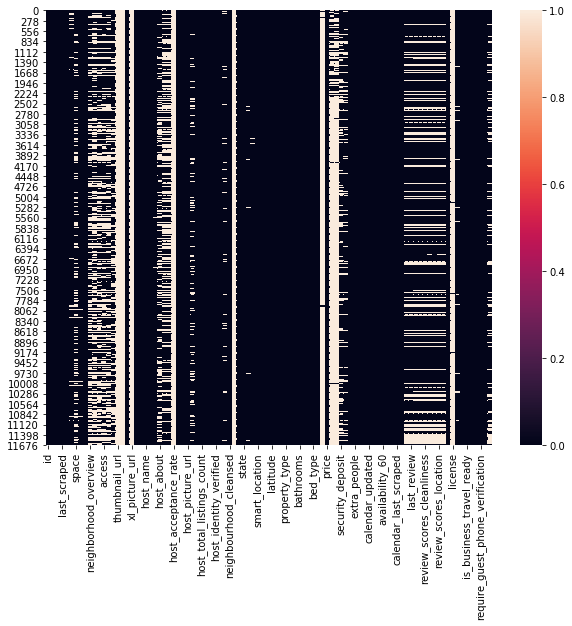

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(listing_data.isnull())

**- From above plot we can say that the dataset consists of many null values in it.**
    **- so let's apply the loop on it get the actual counts in each columns**

In [14]:
for i in listing_data.isnull().sum():
    print(i)

0
0
0
0
2
413
3160
153
0
4329
5652
4842
4366
4601
3462
11922
11922
0
11922
0
0
6
6
56
3976
4013
4013
11922
6
6
6
2204
6
6
0
6
6
0
846
0
11922
0
4
167
22
0
0
0
0
0
0
0
0
0
4
5
8
0
0
11751
0
10675
10879
2935
1691
0
0
0
0
0
0
0
0
0
0
0
0
2163
2160
2293
2299
2295
2310
2301
2313
2315
0
11874
507
0
0
0
0
0
0
2163


**- Lets get More Detailed analysis on the dataset by using pandas profiling**

In [15]:
import pandas_profiling

In [16]:
#profile = pandas_profiling.ProfileReport(listing_data)
#profile

In [4]:
## As its time to run so I commented it. And below mentioned are the report 

#### From this report we got a detailed report of the dataset



    - Number of variables = 96
    - Number of observations = 11922
    - Numeric = 27
    - Categorical = 55
    - Total Missing (%)= 15.6%

- experiences_offered has constant value none, can be ignored
- has_availability has constant value t, can be ignored
- host_acceptance_rate has constant value, can be ignored
- host_total_listings_count is highly correlated with host_listings_count
- is_business_travel_ready has constant value f,can be ignored
- medium_url has constant value, can be ignored
- neighbourhood_group_cleansed has 100.0% missing values
- requires_license has constant value f, can be ignored
- scrape_id has constant value, can be ignored
- thumbnail_url has constant value, can be ignored
- xl_picture_url has constant value, can be ignored

In [17]:
## Now lets drop some columns which are not so usefull

In [18]:
listing_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [19]:
listing_data.drop(columns=['experiences_offered','has_availability','host_acceptance_rate','host_total_listings_count',
                       'is_business_travel_ready','medium_url',"neighbourhood_group_cleansed","requires_license","scrape_id",
                       "thumbnail_url","xl_picture_url"],inplace= True)

In [20]:
listing_data.shape

(11922, 85)

**- As above we see that many columns has null or missing values so let's set a threshold and drop that columns which has null values more than threshold.**

In [21]:
listing_data.isnull().sum()

id                                     0
listing_url                            0
last_scraped                           0
name                                   2
summary                              413
                                    ... 
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
reviews_per_month                   2163
Length: 85, dtype: int64

### Lets set our threshold value as 90% and then drop the columns

In [22]:
drop_cols=[]
for cols in listing_data.columns:
    if listing_data[cols].isnull().sum() >10000:
        drop_cols.append(cols)
print("Number of  columns to be dropped: ", len(drop_cols))
print(drop_cols)
listing_data.drop(drop_cols,axis=1, inplace = True)

Number of  columns to be dropped:  4
['square_feet', 'weekly_price', 'monthly_price', 'license']


In [23]:
listing_data.drop(columns=['last_scraped'],inplace= True)

In [24]:
listing_data.shape

(11922, 80)

**- Here totally we drop 5 columns which have null values more than the threshold**

In [25]:
listing_data.head(2)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,6,https://www.airbnb.com/rooms/6,Large Craftsmen w/ yard ~ Perfect for families,Our Beautiful Craftsmen house has all the mode...,"We are located in the heart of North Park, the...",Our Beautiful Craftsmen house has all the mode...,"We have the best Neighborhood in San Diego, in...",The driveway has room for two cars to park tan...,We are right around the corner from a bus stop...,Guests will have access to everything in the h...,...,10.0,10.0,10.0,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",t,strict_14_with_grace_period,f,f,1,1.18
1,5570,https://www.airbnb.com/rooms/5570,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,While some may compare San Diego’s Mission Bea...,NaN,Bus #8 goes to La Jolla and Old Town transit c...,"2 Bedrooms (1 Queen, 2 Twins) 1 Bath Balcony ...",...,NaN,NaN,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,strict_14_with_grace_period,f,f,2,NaN


### Now lets clean our dataset without unwanted character

In [26]:
listing_data['price']

0          $295.00
1        $2,050.00
2           $84.00
3           $69.00
4          $160.00
           ...    
11917       $70.00
11918      $150.00
11919       $32.00
11920       $32.00
11921       $55.00
Name: price, Length: 11922, dtype: object

**- As we can see the Price colunms contains $ sign infront of each number so lets remove it using regular expression**

In [27]:
listing_data['price'] = listing_data['price'].replace('[\$,]','',regex=True).astype(float)

In [28]:
listing_data['price'].head()

0     295.0
1    2050.0
2      84.0
3      69.0
4     160.0
Name: price, dtype: float64

##### As we are here only getting some insights and not building any model on it. so, we will not going tho do any data imputation,normalization etc here

### Taking Listing_brief dataset

In [29]:
listing_brief_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6,Large Craftsmen w/ yard ~ Perfect for families,29,Sara,NaN,North Hills,32.753993,-117.129705,Entire home/apt,295,2,149,2018-10-07,1.18,1,20
1,5570,Ocean front condo on the sand,8435,Jef Karchin'S MISSIONBEACHRETREAT,NaN,Mission Bay,32.784304,-117.252578,Entire home/apt,2050,3,0,NaN,NaN,2,328
2,8095,Sunset Cliffs Studio,270,Marin,NaN,Ocean Beach,32.735170,-117.243793,Entire home/apt,84,2,178,2015-11-02,1.56,1,0
3,39516,Art Studio Retreat/Rustic Cabin,169649,Chris And Jean,NaN,North Hills,32.731884,-117.119180,Entire home/apt,69,3,338,2018-11-07,3.33,1,273
4,45429,OB cottage SD--view on waterway,197919,Melissa,NaN,Loma Portal,32.748768,-117.229371,Entire home/apt,160,2,6,2014-07-28,0.06,1,363


In [30]:
listing_brief_data.shape

(11922, 16)

**- There are 11922 observation and 16 features.**

In [31]:
## Lets check null values

In [32]:
listing_brief_data.isnull().sum()

id                                    0
name                                  2
host_id                               0
host_name                             6
neighbourhood_group               11922
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2160
reviews_per_month                  2163
calculated_host_listings_count        0
availability_365                      0
dtype: int64

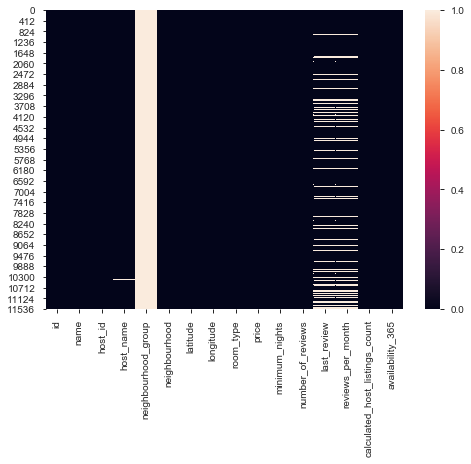

In [33]:
sns.heatmap(listing_brief_data.isnull())

In [ ]:
## As 'neighbourhood_group' columns is having more null values so we can drop it               

In [34]:
listing_brief_data.drop(columns=['neighbourhood_group'],inplace= True)

In [35]:
listing_brief_data.shape

(11922, 15)

#### Now Lets merge both the datasets "listing_data" and "listing_brief_data"

In [37]:
merged_listing = pd.merge(listing_data, listing_brief_data)
merged_listing.shape

(5327, 80)

In [38]:
merged_listing.head(1)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,54001,https://www.airbnb.com/rooms/54001,"La Jolla Peaceful: Sitting Room, Breakfast",NaN,The Peaceful is one of two bedrooms in the de...,The Peaceful is one of two bedrooms in the de...,"Tranquility, stately trees, meditative, zen-fu...",Also on Airbnb and available at the same prope...,If you are debating between renting a car or '...,All common areas.,...,10.0,10.0,10.0,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,flexible,f,t,4,1.82


In [39]:
## lets see all the columns names

In [41]:
merged_listing.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availabili

#### Lets see how many unique elements are there in some of the different columns

In [44]:
merged_listing['street'].unique()

array(['La Jolla, CA, United States', 'San Diego, CA, United States',
       'La Jolla , CA, United States', 'Del Mar, CA, United States',
       'San Diego , CA, United States', 'Ocean Beach, CA, United States',
       'la jolla, CA, United States', 'San diego, CA, United States',
       'La jolla, CA, United States',
       'Ocean Beach, San Diego, CA, United States',
       'LA JOLLA, CA, United States',
       'La Jolla, San Diego, CA, United States',
       'La Mesa, CA, United States', 'Alpine, CA, United States',
       'SAN DIEGO, CA, United States', 'La Jolla , Ca, United States',
       'Del Mar Highlands , CA, United States',
       'San Diego, California, US, CA, United States',
       'سان دييغو, CA, United States', 'Pacific Beach, CA, United States',
       ' La Jolla, CA, United States',
       'La Jolla Shores, CA, United States',
       'Newport Beach, CA, United States',
       'Gas lamp San Diego, CA, United States',
       'Pacific Beach , CA, United States',
      

In [45]:
merged_listing['street'].nunique()

28

**- We can say that there are 28 diffrent types of street are present**

In [46]:
merged_listing['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

**- There are 3 different room_type available**

In [43]:
merged_listing['city'].unique()

array(['La Jolla', 'San Diego', 'La Jolla ', 'Del Mar', 'San Diego ',
       'Ocean Beach', 'la jolla', 'San diego', 'La jolla',
       'Ocean Beach, San Diego', 'LA JOLLA', 'La Jolla, San Diego',
       'La Mesa', 'Alpine', 'SAN DIEGO', 'Del Mar Highlands ',
       'San Diego, California, US', 'سان دييغو', 'Pacific Beach',
       ' La Jolla', 'La Jolla Shores', 'Newport Beach',
       'Gas lamp San Diego', 'Pacific Beach ', 'National City', 'CA',
       'Solana Beach'], dtype=object)

In [47]:
merged_listing['city'].nunique()

27

**- Now there are 27 different cities.But Some same city is written in diffrent style. So now we will make them one same type** 

In [52]:
merged_listing.city.replace( 'La Jolla ', 'La Jolla',inplace = True)
merged_listing.city.replace( 'la jolla', 'La Jolla',inplace = True)
merged_listing.city.replace( 'La jolla', 'La Jolla',inplace = True)
merged_listing.city.replace( 'LA JOLLA', 'La Jolla',inplace = True)
merged_listing.city.replace( 'La Jolla, San Diego', 'La Jolla',inplace = True)
merged_listing.city.replace( 'La Jolla Shores', 'La Jolla',inplace = True)
merged_listing.city.replace( ' La Jolla', 'La Jolla',inplace = True)
merged_listing.city.replace( 'SAN DIEGO', 'San Diego',inplace = True)
merged_listing.city.replace( 'San Diego, California, US', 'San Diego',inplace = True)
merged_listing.city.replace( 'San Diego ', 'San Diego',inplace = True)
merged_listing.city.replace( 'San diego ', 'San Diego',inplace = True)
merged_listing.city.replace( 'Ocean Beach, San Diego', 'Ocean Beach',inplace = True)
merged_listing.city.replace( 'San diego', 'San Diego',inplace = True)
merged_listing.city.replace( 'Pacific Beach ', 'Pacific Beach',inplace = True)
merged_listing.city.replace( 'Del Mar Highlands ', 'Del Mar',inplace = True)
merged_listing['city'].unique()

array(['La Jolla', 'San Diego', 'Del Mar', 'Ocean Beach', 'La Mesa',
       'Alpine', 'سان دييغو', 'Pacific Beach', 'Newport Beach',
       'Gas lamp San Diego', 'National City', 'CA', 'Solana Beach'],
      dtype=object)

In [51]:
merged_listing['city'].nunique()

13

**- Now we can say there  are 13 different cities are present in this dataset.**

### Now Taking Calender Dataset

In [54]:
cal_data.head(3)

,listing_id,date,available,price
0,635756,2019-11-14,t,$67.00
1,292285,2019-11-14,f,NaN
2,292285,2019-11-13,f,NaN


In [55]:
cal_data.shape

(4351530, 4)

**- Here we can see that Calender Dataset is having 4351530 observations and 4 features**

In [56]:
cal_data.isnull().sum()

listing_id          0
date                0
available           0
price         2533587
dtype: int64

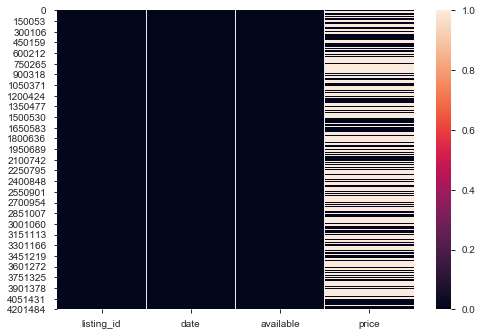

In [57]:
sns.heatmap(cal_data.isnull())

**- We can see here that in calender dataset the "price" column contains too many null values. But We cannot drop it as "price" is very much important Features in any Analysis. So we will impute it with the "Mode" of the price columns.**

In [ ]:
### Lets Remove the $ sign first then impute it with mode

In [58]:
cal_data['price'] = cal_data['price'].replace('[\$,]','',regex=True).astype(float)

In [59]:
cal_data['price'].head()

0    67.0
1     NaN
2     NaN
3     NaN
4     NaN
Name: price, dtype: float64

In [61]:
cal_data['price'].mode()

0    99.0
dtype: float64

In [62]:
cal_data["price"].fillna(cal_data["price"].mode()[0], inplace=True)

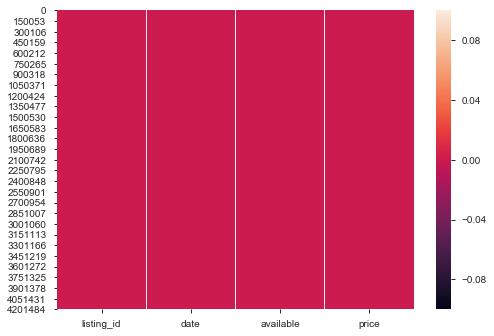

In [64]:
sns.heatmap(cal_data.isnull())

## Taking Reviews and Reviews Brief data

In [65]:
review_data.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6,8,2008-06-22,415,Terrence,Sara is an awesome hostess. She was very cons...
1,6,4383,2009-06-22,3762,Christine,My stay at “Craftsmen” was wonderful! Sara wa...


In [67]:
review_data.shape

(344404, 6)

In [68]:
review_data.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         417
dtype: int64

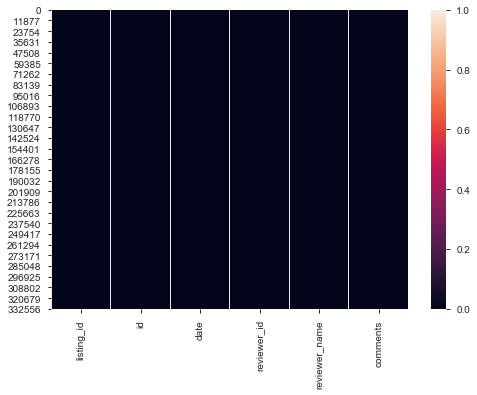

In [69]:
sns.heatmap(review_data.isnull())

**- As we can see there are negligible null values in review dataset set so we can ignore this null values for now** 

In [70]:
### Lets see review_brief data

In [71]:
review_brief_data.head(2)

,listing_id,date
0,6,2008-06-22
1,6,2009-06-22


In [72]:
review_brief_data.shape

(344404, 2)

In [73]:
review_brief_data.isnull().sum()

listing_id    0
date          0
dtype: int64

**- As in review_brief_data same features are present as in review dataset so it is reductant to take it as all the information we can take from the review dataset only.**
**- So ignoring review_brief_data dataset as it will not give any new information.**

### Taking  Neighbourhoods data

In [75]:
neighbour_data.head(5)

,neighbourhood_group,neighbourhood
0,NaN,Allied Gardens
1,NaN,Alta Vista
2,NaN,Amphitheater And Water Park
3,NaN,Balboa Park
4,NaN,Bario Logan


In [76]:
neighbour_data.shape

(108, 2)

In [78]:
neighbour_data.isnull().sum()

neighbourhood_group    108
neighbourhood            0
dtype: int64

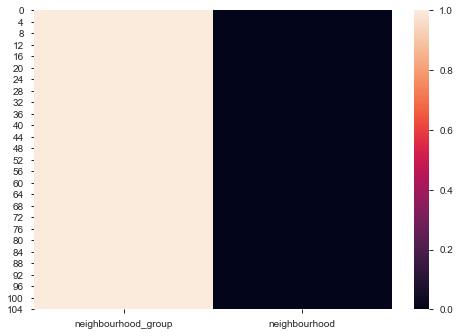

In [79]:
sns.heatmap(neighbour_data.isnull())

**- Here we can see that neighbourhood_group features is totally null. So we cannot get much information from it. So we will drop not consider this table. And can take "neighbourhood" information from the listing dataset.**         

# Lets Try to Get some usefull Insights.

### Let's see Price vs Number of Bedrooms

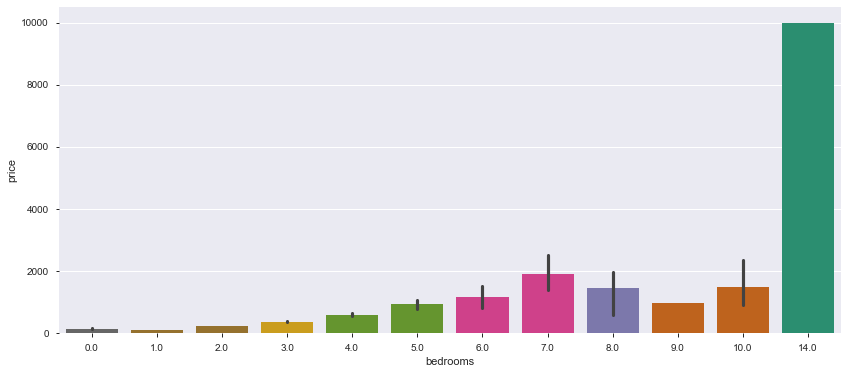

In [97]:
plt.figure(figsize=(14,6))
sns.barplot(x = merged_listing['bedrooms'], y = merged_listing['price'],palette="Dark2_r")

**- As we can see the apt/hotels having More rooms, there price are high.**

### Lets see Price vs Number of Beds

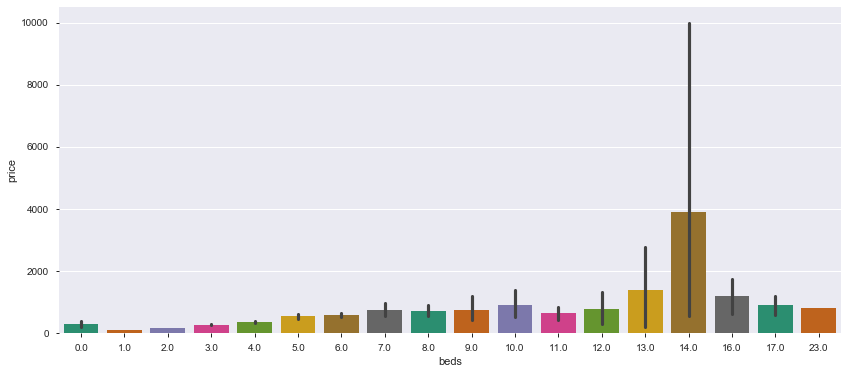

In [95]:
plt.figure(figsize=(14,6))
sns.barplot(x = merged_listing['beds'], y = merged_listing['price'],palette="Dark2")

**- Here we can see that hotel/apt having 13,14 beds are charged high price**

###  Let's see Price vs Number of Bathrooms

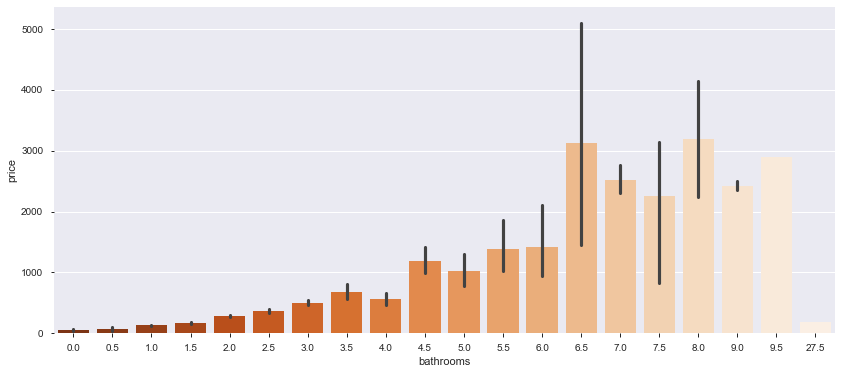

In [100]:
plt.figure(figsize=(14,6))
sns.barplot(x = merged_listing['bathrooms'], y = merged_listing['price'],palette="Oranges_r")

**- Here we can say More the Number of bathrooms more the price with 6.5, 8, 9.5 bathrooms has highest price.**

### Let's see Price vs Number of person a listing can accomodate

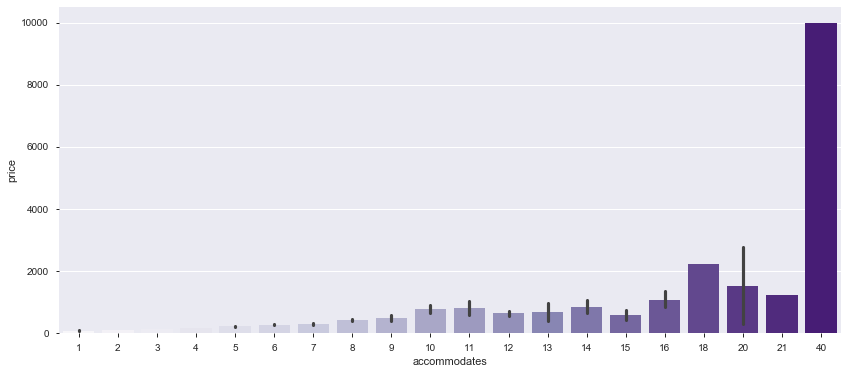

In [102]:
plt.figure(figsize=(14,6))
sns.barplot(x = merged_listing['accommodates'], y = merged_listing['price'],palette="Purples")

**- Here we can see as Number of accomodates increase, price also increase**

###  Let's see the distribution of Price for listings

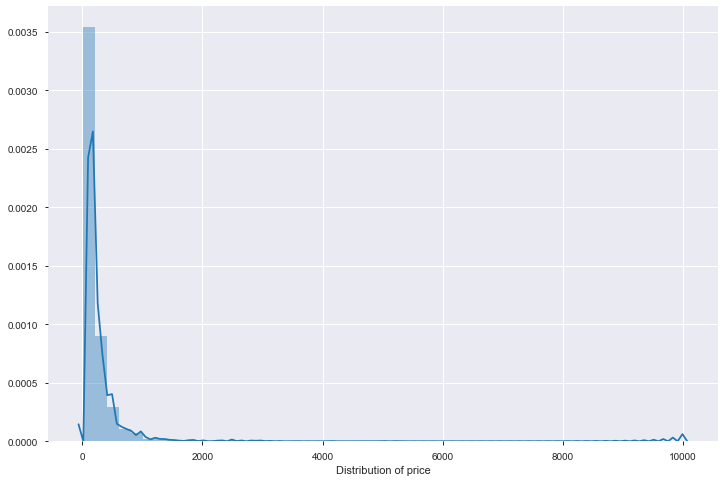

In [105]:
plt.figure(figsize=(12,8))
sns.distplot(merged_listing["price"],axlabel="Distribution of price")

**- We can say that Distribution of Price is right Skewed with maximum price $10000**

#### Let's find Average price

In [107]:
merged_listing["price"].mean()

222.44659282898442

**- We can say that Average is 222.44659282898442 for the listings**

###  Now let's Analyse Correlation in the whole dataset

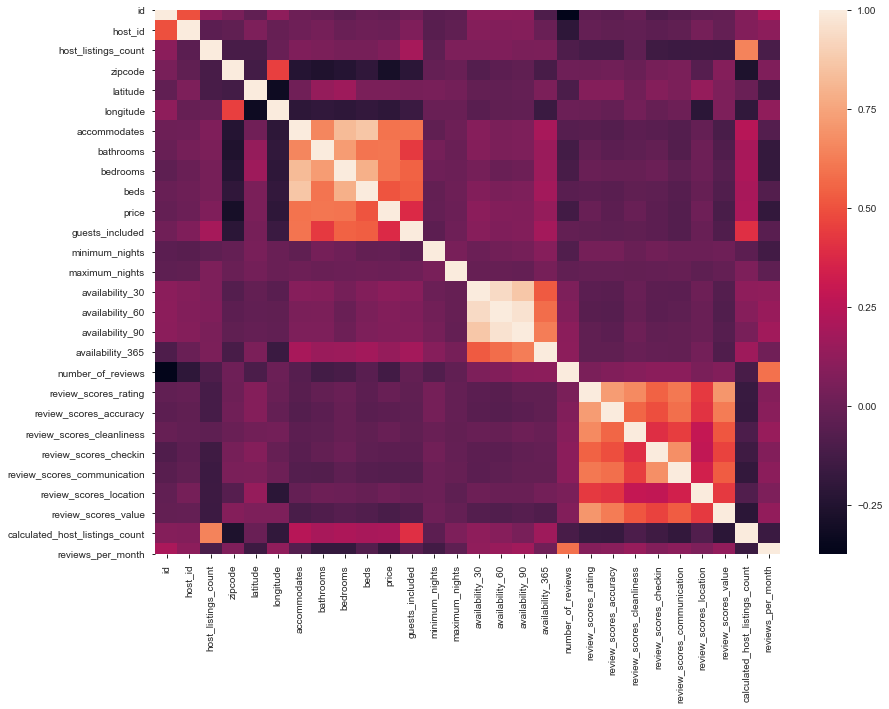

In [109]:
plt.figure(figsize=(14,10))
sns.heatmap(merged_listing.corr())

- From above we can say that there are several features that have (not so) strong correlation.

- But Price is correlated with Number of Bedroom, bathroom, Beds, Availability

- So what we got insights before also, correlation also proves is correct

### Top 10 neighbourhood places that has good ratings

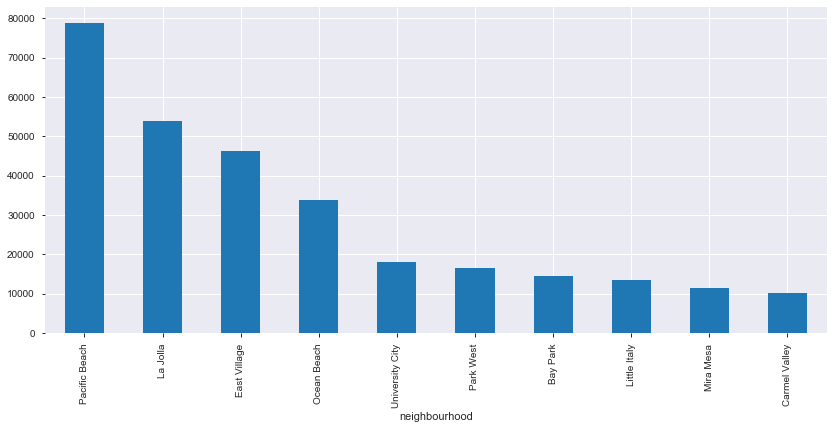

In [112]:
plt.figure(figsize=(14,6))
merged_listing.groupby("neighbourhood")["review_scores_rating"].sum().sort_values(ascending=False).head(10).plot(kind="bar")

### Lets see how does ratings influence price ?

<Figure size 1008x432 with 0 Axes>

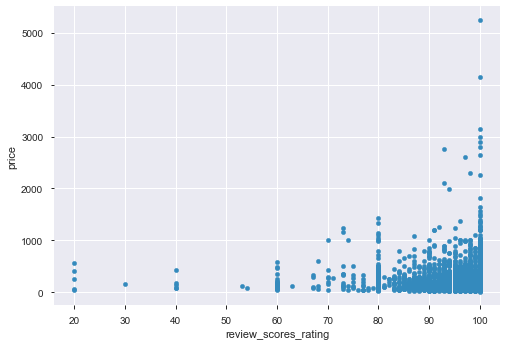

In [114]:
plt.figure(figsize=(14,6))
merged_listing.plot.scatter(y='price', x='review_scores_rating')

**- Here we can see that as the average rating gets increased the price also get increased.**

### Lets find out which City has more price ?

In [115]:
merged_listing.groupby("city")["price"].sum().reset_index().sort_values('price', ascending=False).head(10)

,city,price
10,San Diego,1003508.0
4,La Jolla,149662.0
2,Del Mar,25557.0
12,سان دييغو,2500.0
8,Ocean Beach,855.0
9,Pacific Beach,828.0
5,La Mesa,758.0
0,Alpine,462.0
1,CA,258.0
7,Newport Beach,221.0


**- Here we can see that San Diego has the maximum price and then La Jolla is 2nd highest price and so on.**

### Let's see how Property Type influence Price

In [118]:
merged_listing['property_type'].unique()

array(['House', 'Guesthouse', 'Guest suite', 'Townhouse', 'Apartment',
       'Condominium', 'Bungalow', 'Cottage', 'Loft', 'Treehouse',
       'Serviced apartment', 'Bed and breakfast', 'Hostel', 'Villa',
       'Cabin', 'Camper/RV', 'Other', 'Boutique hotel', 'Tiny house',
       'Castle', 'Earth house', 'Tent', 'Resort', 'Igloo', 'Boat',
       'Campsite', 'Hotel', 'Aparthotel'], dtype=object)

In [119]:
merged_listing.groupby("property_type")["price"].sum().reset_index().sort_values('price', ascending=False).head(5)

,property_type,price
17,House,580320.0
1,Apartment,251146.0
10,Condominium,132585.0
25,Townhouse,58936.0
27,Villa,38233.0


**- As we can see how has the Maximux Price as compared to others property type**

### Lets see Property Type vs Availability in 30 days

In [120]:
merged_listing.groupby("property_type")["availability_30"].count().reset_index().sort_values('availability_30', ascending=False).head(5)

,property_type,availability_30
17,House,1936
1,Apartment,1551
10,Condominium,649
25,Townhouse,323
14,Guesthouse,148


**- Here Also House has more availability as compared to others.**

### Lets do Review Comments Analysis using word cloud

In [121]:
review=review_data["comments"].head(500)
review.shape

(500,)

In [123]:
#!pip install wordcloud

In [124]:
from wordcloud import WordCloud, STOPWORDS

In [125]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in review: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

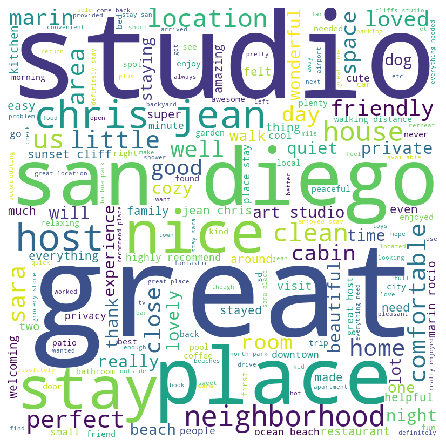

In [128]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


**- We can see with the help of Word cloud Most of the review comments are good and postive.**

### Now Let's find Top 10 Reviewer with their reviewer_id as name are not available

In [130]:
review_data.groupby("reviewer_id").count().sort_values(by="comments",ascending=False)["id"].head(10).reset_index(name='Comment counts')

,reviewer_id,Comment counts
0,64785633,42
1,23653867,40
2,169329871,36
3,139473190,33
4,1649820,29
5,118535408,29
6,4964473,26
7,30012680,24
8,157569393,24
9,85972988,23


**- Here we can see that reviewer_id = 64785633 gave the maximum comments**